In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [32]:
KEGG_df = pd.read_parquet("../data/interim/enzymemap_Kegg_JN_mapped.parquet")
KEGG_df['top_mapped_operator'] = KEGG_df['top_mapped_operator'].fillna("None")

MetaCyc_df = pd.read_parquet("../data/interim/enzymemap_MetaCyc_JN_mapped.parquet")
MetaCyc_df['top_mapped_operator'] = MetaCyc_df['top_mapped_operator'].fillna("None")

In [ ]:
def extract_rule_num(x):
    m = re.search(r'rule(\d+)', x)
    return int(m.group(1)) if m else np.inf   # "None" will become inf

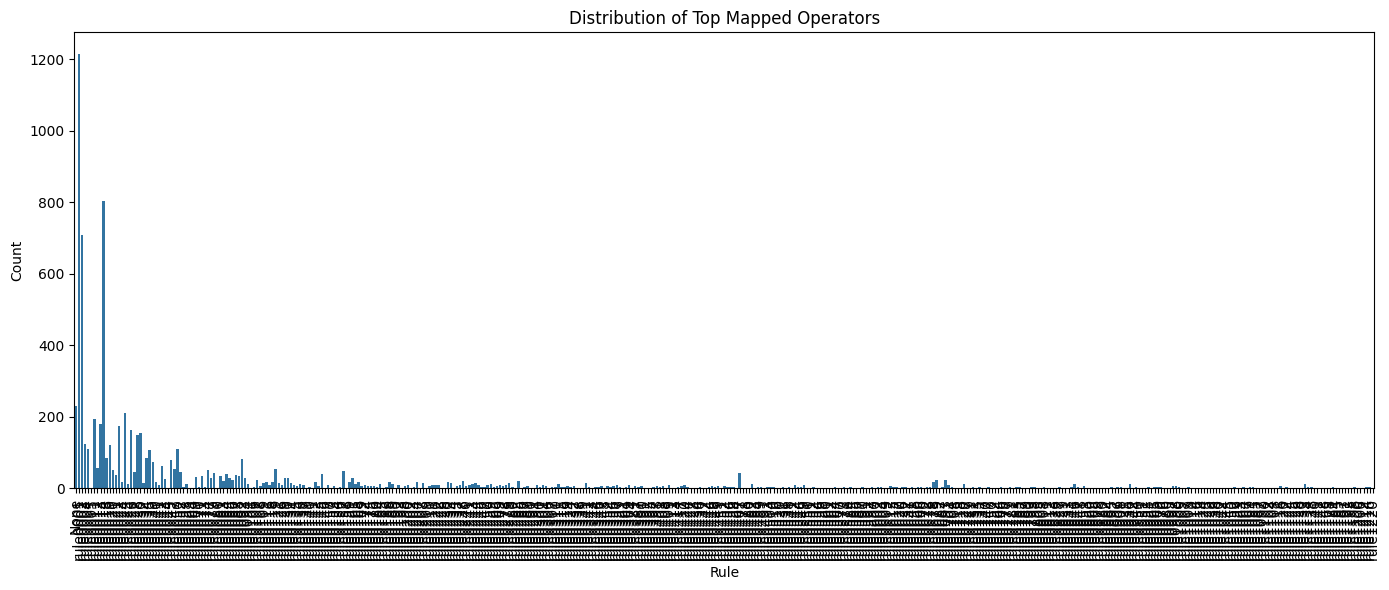

In [30]:
plt.figure(figsize=(14,6))
sns.countplot(data=KEGG_df, x='top_mapped_operator',
              order=sorted(KEGG_df['top_mapped_operator'].unique()))

plt.xticks(rotation=90)
plt.xlabel("Rule")
plt.ylabel("Count")
plt.title("Distribution of Top Mapped Operators")
plt.tight_layout()
plt.show()